# Rank feature value using Random Forest

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)

In [24]:
csv_path = "data/output/mushrooms_new_imputed.csv"
df = pd.read_csv(csv_path)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,s,s,w,w,p,w,o,e,n,a,g


In [25]:
df_encoded = df.apply(LabelEncoder().fit_transform)
X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]
X.shape, y.shape, list(X.columns)[:5]

((19735, 21),
 (19735,),
 ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor'])

In [26]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)

import os

importances_path = "data/output/mushroom_feature_importances.csv"
os.makedirs(os.path.dirname(importances_path), exist_ok=True) 

importances.to_csv(importances_path, index=False)


importances.head(25)

,Feature,Importance
0,odor,0.260803
1,gill-color,0.081722
2,spore-print-color,0.073256
3,gill-size,0.057377
4,ring-type,0.051282
5,stalk-surface-above-ring,0.045363
6,population,0.044326
7,cap-color,0.043607
8,habitat,0.041704
9,stalk-color-below-ring,0.041186


In [27]:
top_features = importances["Feature"].tolist()
top_importances = importances

print("All features:", top_features)
top_importances

All features: ['odor', 'gill-color', 'spore-print-color', 'gill-size', 'ring-type', 'stalk-surface-above-ring', 'population', 'cap-color', 'habitat', 'stalk-color-below-ring', 'stalk-color-above-ring', 'stalk-surface-below-ring', 'cap-shape', 'bruises', 'cap-surface', 'gill-spacing', 'ring-number', 'stalk-shape', 'veil-color', 'gill-attachment', 'veil-type']


,Feature,Importance
0,odor,0.260803
1,gill-color,0.081722
2,spore-print-color,0.073256
3,gill-size,0.057377
4,ring-type,0.051282
5,stalk-surface-above-ring,0.045363
6,population,0.044326
7,cap-color,0.043607
8,habitat,0.041704
9,stalk-color-below-ring,0.041186


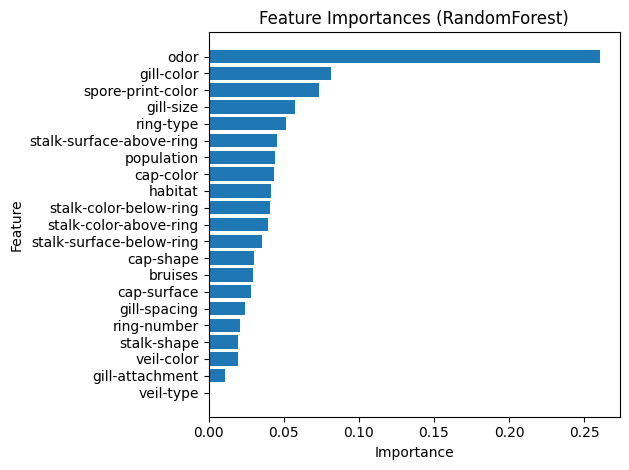

In [28]:
plt.figure()
plt.barh(top_importances["Feature"][::-1], top_importances["Importance"][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances (RandomForest)")
plt.tight_layout()
plt.show()